In [41]:
from tensorflow import keras
import numpy as np
import tensorflow as tf

(t_x, t_y), (tt_x, tt_y) = keras.datasets.fashion_mnist.load_data()

s_t_x = t_x / 255.0
s_tt_x = tt_x / 255.0
s_t_x = s_t_x.reshape(-1, 28 * 28)

In [2]:
from sklearn.model_selection import train_test_split

t_x, v_x, t_y, v_y = train_test_split(s_t_x, t_y, test_size = 0.2, random_state = 42)

In [3]:
dense1 = keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784,))  # 입력노드 784개, 출력노드 100개
dense2 = keras.layers.Dense(10, activation = 'softmax')

model = keras.Sequential([dense1, dense2])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [5]:
model = keras.Sequential([keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784,), name = 'hidden'), 
                          keras.layers.Dense(10, activation = 'softmax', name = 'output')], name = 'model1')

In [6]:
model.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [7]:
model = keras.Sequential(name = 'model2')
model.add(keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784,), name = 'hidden'))
model.add(keras.layers.Dense(10, activation = 'softmax', name = 'output'))
model.summary()

Model: "model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(t_x, t_y, epochs = 10)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5645 - accuracy: 0.8072
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4070 - accuracy: 0.8538
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3715 - accuracy: 0.8652
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3494 - accuracy: 0.8731
Epoch 5/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3323 - accuracy: 0.8791
Epoch 6/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3184 - accuracy: 0.8838
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3070 - accuracy: 0.8876
Epoch 8/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2975 - accuracy: 0.8928
Epoch 9/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2885 - accuracy: 0.8958
Epoch 10/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.280

In [9]:
model = keras.Sequential(name = 'model3')
model.add(keras.layers.Flatten(input_shape = (28, 28)))  # 입력 노드를 직접 설정가능.
model.add(keras.layers.Dense(100, activation = 'relu', name = 'hidden'))
model.add(keras.layers.Dense(10, activation = 'softmax', name = 'output'))
model.summary()

Model: "model3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [10]:
(t_x, t_y), (tt_x, tt_y) = keras.datasets.fashion_mnist.load_data()

s_t_x = t_x / 255.0
t_x, v_x, t_y, v_y = train_test_split(s_t_x, t_y, test_size = 0.2, random_state = 42)

In [11]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(t_x, t_y, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5320 - accuracy: 0.8125
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3930 - accuracy: 0.8588
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3572 - accuracy: 0.8715
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3333 - accuracy: 0.8807
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3190 - accuracy: 0.8867


In [12]:
model.evaluate(v_x, v_y)

375/375 [==============================] - 0s 957us/step - loss: 0.3791 - accuracy: 0.8736


[0.37909048795700073, 0.8735833168029785]

In [13]:
model.compile(optimizer= 'sgd', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [14]:
# 옵티마이저를 직접 설정해서 넣을 수 있음
sgd = keras.optimizers.SGD(learning_rate = 0.1)
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [15]:
# 모멘텀 기법 추가 (https://beoks.tistory.com/30)
sgd = keras.optimizers.SGD(momentum = 0.9, nesterov = True)

In [16]:
keras.optimizers.RMSprop  # 기본 설정 옵티마이저

keras.optimizer_v2.rmsprop.RMSprop

In [17]:
keras.optimizers.Adagrad  # 가장 많이 씀

keras.optimizer_v2.adagrad.Adagrad

In [18]:
model1 = keras.Sequential()
model1.add(keras.layers.Flatten(input_shape = (28, 28)))
model1.add(keras.layers.Dense(100, activation = 'relu', name = 'hidden'))
model1.add(keras.layers.Dense(10, activation = 'softmax', name = 'output'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [21]:
model1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model1.fit(t_x, t_y, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2925 - accuracy: 0.8930
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2798 - accuracy: 0.8972
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2675 - accuracy: 0.9018
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2567 - accuracy: 0.9046
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2495 - accuracy: 0.9082


In [22]:
model.evaluate(v_x, v_y), model1.evaluate(v_x, v_y)
# adam이 성능이 더 좋게 나오지만 항상 그렇지는 않음
# 입력한 데이터에 따라 다르기 때문에 데이터에 맞는 옵티마이저 선택이 중요

375/375 [==============================] - 0s 944us/step - loss: 0.3123 - accuracy: 0.8888


([0.37909048795700073, 0.8735833168029785],
 [0.3122565448284149, 0.8887500166893005])

# 정리

### 데이터 확인

In [24]:
t_x.shape

(48000, 28, 28)

In [26]:
m1 = keras.Sequential()
m1.add(keras.layers.Flatten(input_shape = (28, 28)))
m1.add(keras.layers.Dense(100, activation = 'relu'))
m1.add(keras.layers.Dense(300, activation = 'relu'))
m1.add(keras.layers.Dense(10, activation = 'softmax'))
m1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 300)               30300     
                                                                 
 dense_6 (Dense)             (None, 10)                3010      
                                                                 
Total params: 111,810
Trainable params: 111,810
Non-trainable params: 0
_________________________________________________________________


In [27]:
m1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = m1.fit(t_x, t_y, epochs = 30, validation_data = (v_x, v_y))

Epoch 1/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5037 - accuracy: 0.8170 - val_loss: 0.4048 - val_accuracy: 0.8528
Epoch 2/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3699 - accuracy: 0.8631 - val_loss: 0.3540 - val_accuracy: 0.8712
Epoch 3/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3334 - accuracy: 0.8755 - val_loss: 0.3622 - val_accuracy: 0.8702
Epoch 4/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3092 - accuracy: 0.8854 - val_loss: 0.3412 - val_accuracy: 0.8748
Epoch 5/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2908 - accuracy: 0.8914 - val_loss: 0.3483 - val_accuracy: 0.8748
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2746 - accuracy: 0.8965 - val_loss: 0.3466 - val_accuracy: 0.8789
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2616 - accuracy: 0.8999 - val_loss: 0.3257 - val_accuracy:

In [28]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1500}

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

(0.0, 1.0)

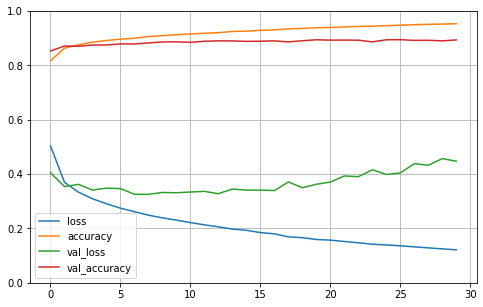

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

# loss를 보면 과대적합이 발생한 것을 볼 수 있음

In [31]:
m2 = keras.Sequential()
m2.add(keras.layers.Flatten(input_shape = (28, 28)))
m2.add(keras.layers.Dense(300, activation = 'relu'))
m2.add(keras.layers.Dense(100, activation = 'relu'))
m2.add(keras.layers.Dense(10, activation = 'softmax'))
m2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 300)               235500    
                                                                 
 dense_8 (Dense)             (None, 100)               30100     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [32]:
m2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history1 = m2.fit(t_x, t_y, epochs = 20, validation_data = (v_x, v_y))

Epoch 1/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4954 - accuracy: 0.8214 - val_loss: 0.4126 - val_accuracy: 0.8501
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3704 - accuracy: 0.8628 - val_loss: 0.3804 - val_accuracy: 0.8612
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3335 - accuracy: 0.8763 - val_loss: 0.3571 - val_accuracy: 0.8707
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3068 - accuracy: 0.8867 - val_loss: 0.3580 - val_accuracy: 0.8736
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2883 - accuracy: 0.8926 - val_loss: 0.3511 - val_accuracy: 0.8707
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2737 - accuracy: 0.8974 - val_loss: 0.3186 - val_accuracy: 0.8850
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2589 - accuracy: 0.9030 - val_loss: 0.3239 - val_accuracy:

(0.0, 1.0)

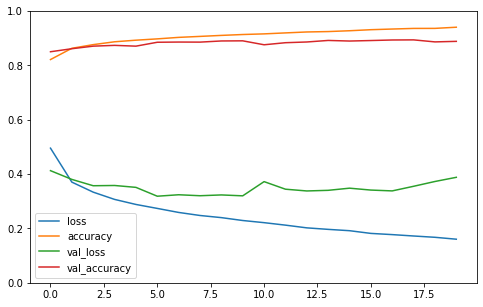

In [33]:
pd.DataFrame(history1.history).plot(figsize = (8, 5))
plt.gca().set_ylim(0, 1)

# 수식의 수가 많아짐에 따라서 과대적합되는 속도도 빨라짐

In [34]:
m3 = keras.Sequential()
m3.add(keras.layers.Flatten(input_shape = (28, 28)))
m3.add(keras.layers.Dense(300, activation = 'relu'))
m3.add(keras.layers.Dense(100, activation = 'relu'))
m3.add(keras.layers.Dense(10, activation = 'softmax'))
m3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 300)               235500    
                                                                 
 dense_11 (Dense)            (None, 100)               30100     
                                                                 
 dense_12 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [35]:
# 옵티마이저 sgd로 변경
m3.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history2 = m3.fit(t_x, t_y, epochs = 20, validation_data = (v_x, v_y))

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7558 - accuracy: 0.7543 - val_loss: 0.5746 - val_accuracy: 0.7924
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5013 - accuracy: 0.8245 - val_loss: 0.4726 - val_accuracy: 0.8367
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4521 - accuracy: 0.8423 - val_loss: 0.4364 - val_accuracy: 0.8492
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4242 - accuracy: 0.8511 - val_loss: 0.4134 - val_accuracy: 0.8576
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4027 - accuracy: 0.8587 - val_loss: 0.4122 - val_accuracy: 0.8575
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3881 - accuracy: 0.8636 - val_loss: 0.3927 - val_accuracy: 0.8618
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3723 - accuracy: 0.8684 - val_loss: 0.3773 - val_accuracy:

(0.0, 1.0)

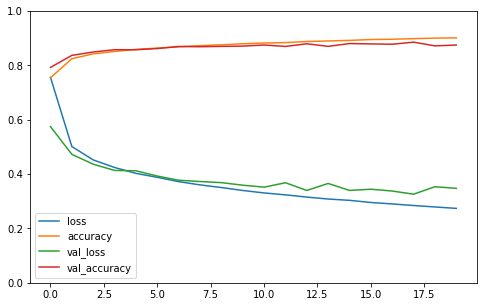

In [37]:
pd.DataFrame(history2.history).plot(figsize = (8, 5))
plt.gca().set_ylim(0, 1)

# 옵티마이저에 따라 손실률, 정확도가 달라짐
# 그래프를 확인하면서 손실률이 낮아지는지, 정확도가 높아지는지 확인해야함
# 손실률이 낮아지지 않으면 과소적합

In [42]:
m3.evaluate(s_tt_x, tt_y)

313/313 [==============================] - 1s 4ms/step - loss: 0.3790 - accuracy: 0.8642


[0.37902456521987915, 0.8641999959945679]

In [43]:
m2.evaluate(s_tt_x, tt_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.4218 - accuracy: 0.8839


[0.4217817485332489, 0.883899986743927]

In [44]:
m1.evaluate(s_tt_x, tt_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.4955 - accuracy: 0.8911


[0.4955378770828247, 0.8910999894142151]